In [9]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import numpy as np
import joblib
import sys
import imodels
import imodelsx.process_results
from collections import defaultdict
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from tabpfn import TabPFNClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# generate synthetic data from decision trees of increasing depths and test tabpfn acc
r = defaultdict(list)
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
r['depth'] = depths
for depth in tqdm(depths):
    X, y = make_classification(
        n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    y_train_tree = tree.predict(X_train)
    y_test_tree = tree.predict(X_test)

    classifier = TabPFNClassifier(device='cpu')
    classifier.fit(X_train, y_train_tree)
    y_test_tabpfn = classifier.predict(X_test)
    acc = accuracy_score(y_test_tree, y_test_tabpfn)
    r['acc'].append(acc)
    print(acc)

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:05<00:45,  5.04s/it]

1.0


 20%|██        | 2/10 [00:10<00:40,  5.08s/it]

0.996969696969697


 30%|███       | 3/10 [00:15<00:35,  5.11s/it]

0.9757575757575757


 40%|████      | 4/10 [00:20<00:30,  5.13s/it]

0.9121212121212121


 50%|█████     | 5/10 [00:25<00:25,  5.02s/it]

0.8818181818181818


 60%|██████    | 6/10 [00:30<00:19,  4.98s/it]

0.8818181818181818


 70%|███████   | 7/10 [00:35<00:14,  4.98s/it]

0.8727272727272727


 80%|████████  | 8/10 [00:40<00:09,  4.97s/it]

0.8727272727272727


 90%|█████████ | 9/10 [00:45<00:04,  4.95s/it]

0.8575757575757575


100%|██████████| 10/10 [00:49<00:00,  4.96s/it]

0.8818181818181818


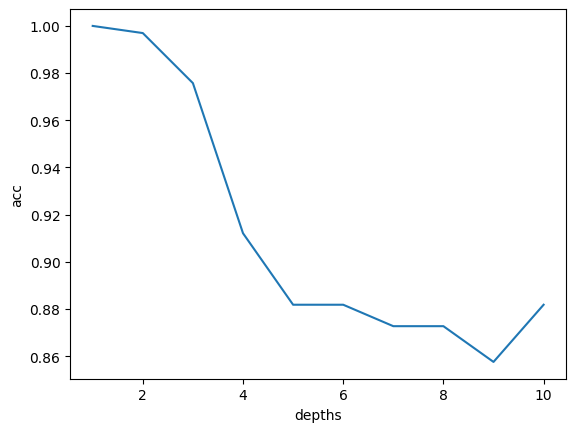

In [ ]:
r = pd.DataFrame(r)
sns.lineplot(data=r, x='depth', y='acc')
plt.show()